# In today's digital age, the rise of SMS-based communication has led to a significant increase in fraudulent messages.The "SafeComm Digital Security Solutions" project aims to address this issue by developing an advanced machine-learning system, capable of  accurately identifying and flagging fraudulent SMS messages. Our goal is to enhance digital communication security and protect users from potential scams and malicious activities.  for that we use a dataset containing SMS messages that are labeled as either   fraudulent or legitimate (Binary indicator if the SMS is fraudulent (1 for Yes, 0 for No)),


First, let's import all the Necessary libraries for our journey  . 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


we load and read the content of our dataset

In [2]:
import pandas as pd

# Load the dataset
sms_data = pd.read_csv('sms.csv')

 Display the first few rows of the dataset

In [3]:

sms_data.head()

,Fraudolent,SMS test,ID,Date and Time
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,1EWYRBL,2017-12-02
1,0,And also I've sorta blown him off a couple tim...,ZY4PDK7,2018-03-23
2,0,Mmm thats better now i got a roast down me! i...,KLUX2C6,2016-10-29
3,0,Mm have some kanji dont eat anything heavy ok,955HXJ0,2018-04-12
4,0,So there's a ring that comes with the guys cos...,00Q6EUC,2016-08-01


# The first step of our journey is to , tackle  an initial exploration phase called Explanatory Data Analysis (EDA). We want to  understand what we are dealing with (and checking if our dataset contains missing values )  . The main focus are  on two things: figuring out how many messages are fraudulent and looking at how long these messages are.

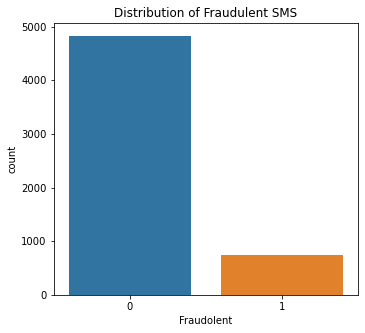

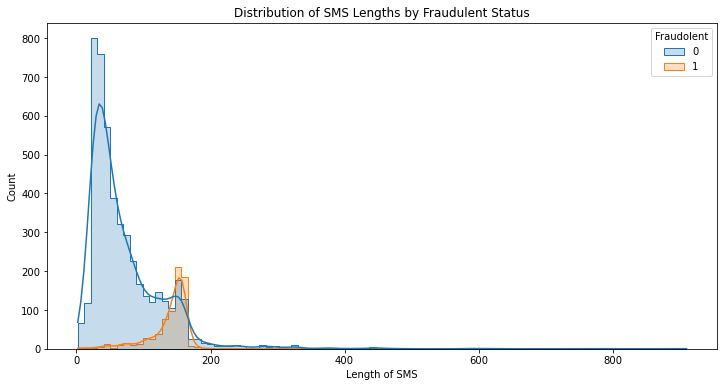

(Fraudolent       0
 SMS test         0
 ID               0
 Date and Time    0
 Text Length      0
 Year             0
 Month            0
 Day              0
 Hour             0
 dtype: int64,
 0    0.865937
 1    0.134063
 Name: Fraudolent, dtype: float64,
 count    5572.000000
 mean       80.368988
 std        59.926946
 min         2.000000
 25%        35.750000
 50%        61.000000
 75%       122.000000
 max       910.000000
 Name: Text Length, dtype: float64)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = sms_data.isnull().sum()

# Analyze the distribution of the 'Fraudulent' variable
fraud_distribution = sms_data['Fraudolent'].value_counts(normalize=True)

# Explore the 'SMS Text' lengths
sms_data['Text Length'] = sms_data['SMS test'].apply(len)

# Add a new column for the length of the SMS
text_length_distribution = sms_data['Text Length'].describe()
 


# Plotting the distribution of the 'Fraudulent' variable 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Fraudolent', data=sms_data)
plt.title('Distribution of Fraudulent SMS')

 
# Plotting the distribution of SMS lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=sms_data, x='Text Length', hue='Fraudolent', element='step', kde=True)
plt.title('Distribution of SMS Lengths by Fraudulent Status')
plt.xlabel('Length of SMS')
plt.ylabel('Count')
plt.show()

missing_values, fraud_distribution, text_length_distribution



Count of Fraudulent vs. Non-Fraudulent SMS shows : 

The value 0.865937 suggests that approximately 86.59% of the SMS messages in your dataset are not fraudulent, 

while 0.134063 indicates that about 13.41% are fraudulent.

# First, by counting how many messages are pinned as fraudulent compared to those that aren't , we get a clear picture of what our data lookes like. This step allowes us to  see how many of each type we have .As it can bee noticed our dataset contains 86.6% of non fraudolent messages and just 13.4% of fraudolent ones. this Representation shows a considerabel inbalance (the imbalance between the distribution of fraudulent and non-fraudulent messages.)and gives us an idea on how to later train our models to do their respective functions. 


The descriptive statistics for a 'Text Length' variable, shows : 

count: There are 5,572 SMS messages that were analyzed.

mean: On average, SMS messages are 80.37 characters or words long.

std (standard deviation): The length of SMS messages varies with a standard deviation of about 59.93, which indicates a significant spread around the mean length.

min: The shortest SMS message has 2 characters or words.

max: The longest SMS message contains 910 characters or words.

# Secondly, we look at the length of the SMS messages. This might seem unusual at first, but, we think that maybe fraudulent messages have a certain length — perhaps they're longer with more convincing details, or maybe they're short and straight to the point.For that we explore the sms text lenght , create a new colom that gives us the lenght of the sms to finally be able to visualise it in the form of a histplot 
# By examining this, we potentially discovered a pattern that would help us in identifying the fraudulent messages later with our machine learning models.Indeed we can perceive a lenght difference between fraudolent and non fraudolent message as the fraudolent ones are generally shorter 


# will also checked for missing values and concluded that we have non (The dataset has no missing values in any of the columns (Fraudulent, SMS Text, ID, Date and Time).) 

In [5]:
#checking if our text_lenght column was well added 
# Display the first few rows of the dataset
sms_data.head()

,Fraudolent,SMS test,ID,Date and Time,Text Length
0,0,Squeeeeeze!! This is christmas hug.. If u lik ...,1EWYRBL,2017-12-02,147
1,0,And also I've sorta blown him off a couple tim...,ZY4PDK7,2018-03-23,116
2,0,Mmm thats better now i got a roast down me! i...,KLUX2C6,2016-10-29,102
3,0,Mm have some kanji dont eat anything heavy ok,955HXJ0,2018-04-12,45
4,0,So there's a ring that comes with the guys cos...,00Q6EUC,2016-08-01,112


# After tackling the too main focus points we want to see if the words frequency could play a role by hepling  us  and giving  us an idea on how to later train our models to do their respective functions. 


In [6]:

# Filter for fraudulent SMS messages
fraudulent_sms = sms_data[sms_data['Fraudolent'] == 1]['SMS test']

# Combine all fraudulent SMS messages into a single string
all_fraudulent_sms = " ".join(message for message in fraudulent_sms)

# Tokenize the string into words
words = all_fraudulent_sms.split()

# Count the frequency of each word
word_counts = Counter(words)

# Most common words
most_common_words = word_counts.most_common(20)  # You can adjust the number to get more or fewer words

# Convert the most common words to a DataFrame for easy visualization
df_most_common_words = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Display the DataFrame
df_most_common_words



,Word,Frequency
0,to,604
1,a,360
2,your,187
3,or,185
4,call,183
5,the,175
6,for,169
7,2,169
8,you,164
9,is,142


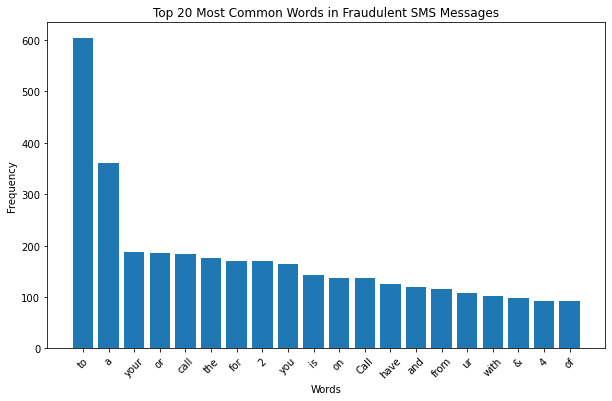

In [7]:
# Plotting the frequencies of the most common words
plt.figure(figsize=(10, 6))
plt.bar(df_most_common_words['Word'], df_most_common_words['Frequency'])
plt.title('Top 20 Most Common Words in Fraudulent SMS Messages')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


# After plotting the frequencies of the most common words in fraudulent SMS messages on a bar graph, we have reached the conclusion that this parameter is not suitable for helping us identify fraudulent SMS messages. It could, in fact, be biased because many of the most frequently used words in fraudulent SMS messages are common words that are also used in everyday life and, in our specific case, in legitimate SMS messages.

# Now lets explore the temporal aspects of SMS traffic to uncover any discernible patterns that could potentially indicate fraudulent activity. To accomplish this, we transform timestamps into distinct date-time characteristics and then proceed to examine how SMS messages are distributed across different months and specific days of the month.

In [8]:

# Preprocessing 'Date and Time'
# Convert 'Date and Time' into a datetime object
sms_data['Date and Time'] = pd.to_datetime(sms_data['Date and Time'])

# Extracting features from 'Date and Time'
# For simplicity, we will extract year, month, day, and hour as features
sms_data['Year'] = sms_data['Date and Time'].dt.year
sms_data['Month'] = sms_data['Date and Time'].dt.month
sms_data['Day'] = sms_data['Date and Time'].dt.day
sms_data['Hour'] = sms_data['Date and Time'].dt.hour


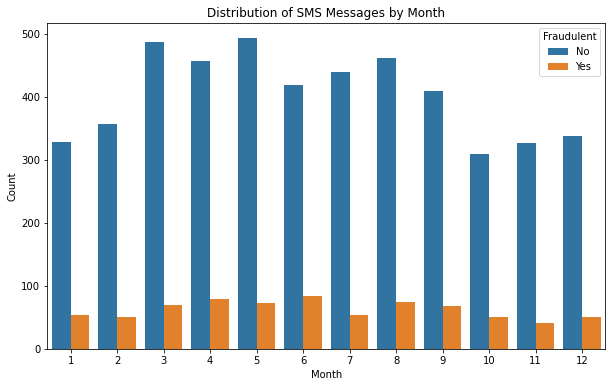

In [9]:
# Visualize the number of SMS messages by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', hue='Fraudolent', data=sms_data)
plt.title('Distribution of SMS Messages by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Fraudulent', labels=['No', 'Yes'])
plt.show()

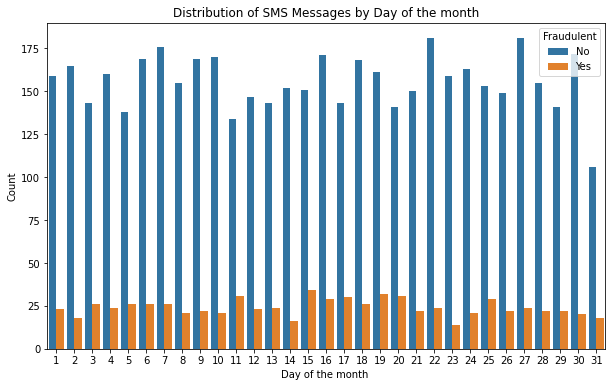

In [10]:
# Visualize the number of SMS messages by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day', hue='Fraudolent', data=sms_data)
plt.title('Distribution of SMS Messages by Day of the month')
plt.xlabel('Day of the month ')
plt.ylabel('Count')
plt.legend(title='Fraudulent', labels=['No', 'Yes'])
plt.show()


# Our visual analysis of the data reveals that the frequency of SMS messages varies from one month to another. However, it's worth noting that fraudulent messages are consistently present, although they occur less frequently in comparison. When we conduct a day-to-day analysis, we do not observe significant fluctuations in the occurrence of fraud, which suggests that there is no immediate correlation with particular days. however we decided to keep this colomn because these features might reveal hidden patterns  when cross-analyzed with other variables, which could contribute valuable information 

# For the second step of our journey we are goig to  pre-process our dataset. This involves the one-hot encoding of categorical data, transforming textual content into numerical representations via TF-IDF, and normalizing the continuous variables to ensure a same level for our models this step is the key of creating a adequate  groundwork for an accurate model training and evaluation.



In [13]:
from sklearn.preprocessing import StandardScaler

# Data Preprocessing

# 1. One-hot encoding of the 'Fraudulent' column
encoder = OneHotEncoder(sparse=False)
fraudulent_encoded = encoder.fit_transform(sms_data[['Fraudolent']])

# 2. Text Preprocessing: Vectorizing the 'SMS Text' using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
sms_tfidf = tfidf_vectorizer.fit_transform(sms_data['SMS test'])

# Preprocessing 'Date and Time'again( redoing it just for us not to get lost )
# Convert 'Date and Time' into a datetime object 
sms_data['Date and Time'] = pd.to_datetime(sms_data['Date and Time'])

# Extracting features from 'Date and Time'again(just for us not to get lost )
sms_data['Year'] = sms_data['Date and Time'].dt.year
sms_data['Month'] = sms_data['Date and Time'].dt.month
sms_data['Day'] = sms_data['Date and Time'].dt.day
sms_data['Hour'] = sms_data['Date and Time'].dt.hour

# Standardizing the continuous features: 'Text Length', 'Year', 'Month', 'Day', 'Hour'
continuous_features = sms_data[['Text Length', 'Year', 'Month', 'Day', 'Hour']]
scaler = StandardScaler()
continuous_features_scaled = scaler.fit_transform(continuous_features)

# Combine all features: One-hot encoded 'Fraudulent', TF-IDF 'SMS Text', and scaled continuous features
X_combined = np.hstack([fraudulent_encoded, sms_tfidf.toarray(), continuous_features_scaled])

y = sms_data['Fraudolent'].values

# Splitting the dataset into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_combined, y, test_size=0.2, random_state=42)

X_train_dt.shape, X_test_dt.shape


((4457, 3007), (1115, 3007))


<i> the 'ID' column in a dataset typically serves as a unique identifier for each record and does not hold any intrinsic predictive power for the model.It usually contains unique values for each instance and does not have a relationship or pattern that would help in predicting the target variable, and it could lead to overfitting.
 
 df = df.drop('ID', axis=1)
 Drop the 'ID' column from the training features
X_train = X_train.drop('ID', axis=1)

 Drop the 'ID' column from the test features
X_test = X_test.drop('ID', axis=1) 

This  codes represent one of the ways of droping the ID colom while working with training and test sets 
for my case i decided not to drop it 
Its retention could facilitates a seamless audit trail to backtrack and investigate any anomalies or misclassifications post-model training.

# In this Model Selection and Training phase of our project, we have a crucial decision to make: what kind of problem are we actually solving with our machine learning models? After a close look at our data and objectives, we concluded that we are dealing with a classification problem. Why? Because our main goal is to sort each SMS message into one of two distinct categories: fraudulent or not fraudulent. This is the essence of classification . This decision shaped our approach to selecting the appropriate machine learning models, such as Logistic Regression, Naive , Decision Trees,and Radom Forest all of which are well-suited for this kind of binary (two-category) classification task


# In this phase each model is carefully initialized with class weights to counteract the imbalance in our data . The models are then put to the test, with their performance measured by metrics such as accuracy, precision, recall, and F1 score. These metrics provide us with a full view of each model's predictive skills .

# To improve our models even further, we cunduct hyperparameter tuning using GridSearchCV and RandomizedSearchCV. These methods help us explore various combinations of parameters to find the settings that work best. We choose the best parameters with a strong focus on reducing false negatives in our fraud detection system. 

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize the model with class weights to handle the imbalance
model = LogisticRegression(class_weight='balanced')

# Fit the model on the training data
model.fit(X_train_dt, y_train_dt)  # Make sure X_train and y_train are defined correctly

# Predict on the test data
y_pred = model.predict(X_test_dt)  # Make sure X_test is defined correctly



# Calculate evaluation metrics
accuracy = accuracy_score(y_test_dt, y_pred)
precision = precision_score(y_test_dt, y_pred)
recall = recall_score(y_test_dt, y_pred)
f1 = f1_score(y_test_dt, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],  # Optimization algorithms
    'max_iter': [10000]  # Increase the number of iterations for convergence
}

# Initialize the Logistic Regression model with class_weight='balanced'
model_reg = LogisticRegression(class_weight='balanced')

# Set up GridSearchCV
grid_search = GridSearchCV(model_reg, param_grid, cv=10, scoring="recall", verbose=0)

# Fit the grid search to the data
grid_search.fit(X_train_dt, y_train_dt)

# Output the best parameters
print(grid_search.best_params_)


/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/cherineabboud/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/che

{'C': 0.0001, 'max_iter': 10000, 'penalty': 'none', 'solver': 'newton-cg'}


 With C set to 0.0001, the model prioritizes simplicity to prevent overfitting. 
 The use of penalty: 'none' and a high max_iter of 10,000 ensures that the model converges properly during training, and the solver: 'newton-cg' is chosen for its efficiency with large datasets and support for no penalty.


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Decision Tree model with class weights to handle the imbalance
decision_tree_model = DecisionTreeClassifier(class_weight='balanced')

# Fit the model on the training data
decision_tree_model.fit(X_train_dt, y_train_dt)  # Make sure X_train_dt and y_train_dt are defined correctly

# Predict on the test data
y_pred_dt = decision_tree_model.predict(X_test_dt)  # Make sure X_test_dt is defined correctly

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
precision_dt = precision_score(y_test_dt, y_pred_dt, average='binary')
recall_dt = recall_score(y_test_dt, y_pred_dt, average='binary')
f1_dt = f1_score(y_test_dt, y_pred_dt, average='binary')

# Print the metrics
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Decision Tree model with class weights to handle the imbalance
decision_tree_model = DecisionTreeClassifier(class_weight='balanced')

# Define the hyperparameter grid for the Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],  # The function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': [None, 'balanced']  # Weights associated with classes
}

# Initialize RandomizedSearchCV with the model and the hyperparameter grid
random_search = RandomizedSearchCV(decision_tree_model, param_grid, n_iter=100, cv=10, scoring="recall", verbose=0)

# Fit the random search to the data
random_search.fit(X_train_dt, y_train_dt)

# Output the best parameters
print(random_search.best_params_)


{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 30, 'criterion': 'gini', 'class_weight': 'balanced'}


 The model is configured with a max_depth of 30 to allow the tree to expand sufficiently to capture variation in the data. min_samples_split: 2 and min_samples_leaf: 4 prevent the tree from growing too complex and memorizing the training data. The tree uses the 'gini' criterion for impurity reduction and 'balanced' class_weight to counteract the imbalance in the dataset.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the RandomForest model with class weights to handle the imbalance
model_rf = RandomForestClassifier(class_weight='balanced')

# Fit the model to the training data
model_rf.fit(X_train_dt, y_train_dt)  # Ensure X_train_dt and y_train_dt are your training set variables

# Predict on the test set
y_pred_rf = model_rf.predict(X_test_dt)  # Ensure X_test_dt is your test set variable

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test_dt, y_pred_rf)
precision_rf = precision_score(y_test_dt, y_pred_rf, average='binary')
recall_rf = recall_score(y_test_dt, y_pred_rf, average='binary')
f1_rf = f1_score(y_test_dt, y_pred_rf, average='binary')

# Print the metrics
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Classifier model
model_rf = RandomForestClassifier()

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 250, 500],  # Number of trees in the forest
    'max_depth': [3, 5, 7],  # Maximum depth of the tree
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': [None, 'balanced']  # Weights associated with classes
}

# Initialize GridSearchCV with the model and the hyperparameter grid
grid_search = GridSearchCV(model_rf, param_grid, cv=10, scoring="recall", verbose=0)

# Fit the grid search to the data
grid_search.fit(X_train_dt, y_train_dt)

# Output the best parameters
print(grid_search.best_params_)


{'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 250}


 This ensemble model uses 250 n_estimators, indicating it averages predictions over 250 individual trees, which helps reduce variance. A max_depth of 5 ensures the individual trees do not overfit, and 'sqrt' max_features limits the number of features each tree considers, promoting diversity among the trees. Similar to the Decision Tree, class_weight: 'balanced' addresses the class imbalance in the dataset.


we fine-tuned the hyperparameters of Logistic Regression, Decision Trees, and Random Forest models. These hyperparameters include things like the strength of regularization (C), the maximum depth of trees (max_depth), and the number of trees in the Random Forest (n_estimators). Our goal is to make sure the models handle issues like overfitting and the imbalance between fraudulent and non-fraudulent messages. We paid special attention to the class_weight parameter, which played a crucial role in addressing the imbalance in our data. This help our models to do  accurate predictions when faced with new data.

In [24]:
import pandas as pd

# Initialize a dictionary to hold the evaluation metrics for each model
d = {
    'Logistic Regression': [accuracy, precision, recall, f1],  # Added comma here
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf]
}

# Round the values for better readability
for model in d:
    d[model] = [round(metric, 2) for metric in d[model]]

# Create DataFrame from the dictionary
dff = pd.DataFrame.from_dict(d, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the DataFrame
print(dff)


                     Accuracy  Precision  Recall  F1 Score
Logistic Regression       1.0        1.0     1.0       1.0
Decision Tree             1.0        1.0     1.0       1.0
Random Forest             1.0        1.0     1.0       1.0


# The results displayed in the DataFrame suggest that all three models have achieved perfect scores across all metrics. This indicates that each model has predicted every test sample correctly.

In [33]:
model = model
model.fit(X_train_dt, y_train_dt)

y_pred = model.predict(X_test_dt)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_dt, y_pred_rf)
precision = precision_score(y_test_dt, y_pred_rf)
recall = recall_score(y_test_dt, y_pred_rf)
f1 = f1_score(y_test_dt, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# we decided to choose logistic regression as our final model 